## Bird Migration ##

1. This dataset is published by "LifeWatch INBO" and apart from this they have released various dataset one can check it from their website. 

2. This dataset shows migration of birdpattern specially three birdname *Eric*, *Nico* and *Sanne*.I have tried to explain:
    * What are their average mean speed
    * What are their travelling pattern on 2D plot and 3D plot
    
    


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
birddata = pd.read_csv("bird_tracking.csv")

birddata.head(2)
#bird_names = birddata.bird_name.unique()


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.15000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.43836,Eric


In [3]:
bird_names = birddata.bird_name.unique()

Here i am showing travelling pattern for all three birds.

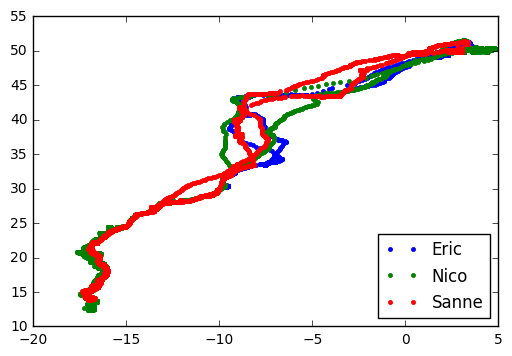

In [4]:
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    y, x = birddata.latitude[ix], birddata.longitude[ix]
    plt.plot(x, y,".", label=bird_name)
plt.ylabel = "latitude"
plt.xlabel = "longitude"
plt.legend(loc = "lower right")
plt.show()


Plotting Speed data of Birds.

TypeError: 'str' object is not callable

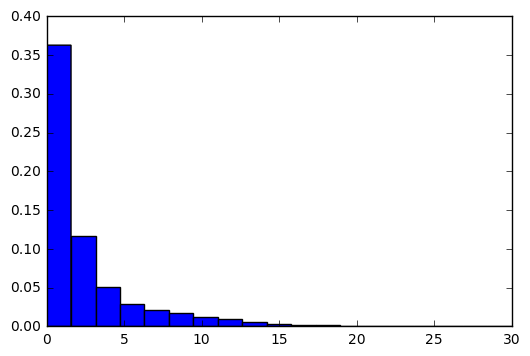

In [5]:
speed = birddata.speed_2d
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0, 30, 20), normed = True)
plt.xlabel("2D speed m/s")
plt.ylabel("Frequency")
plt.show()


TypeError: 'str' object is not callable

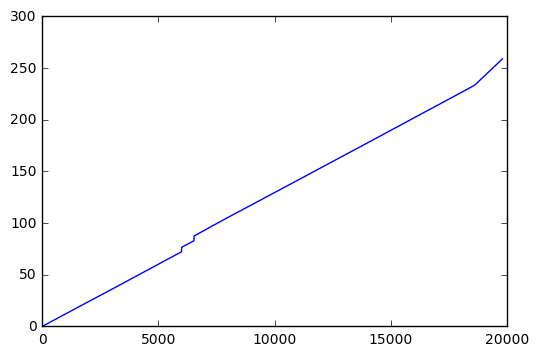

In [6]:
import datetime
timestemp = []
for k in range(len(birddata)):
    timestemp.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3],\
                                                "%Y-%m-%d %H:%M:%S"))

birddata["timestemp"] = pd.Series(timestemp, index = birddata.index)

#birddata.timestemp[3] - birddata.timestemp[2]
times = birddata.timestemp[birddata.bird_name == "Eric"]
elasped_time = [time - times[0] for time in times]
plt.plot(np.array(elasped_time) / datetime.timedelta(days = 1))
plt.xlabel("observation")
plt.ylabel("Elasped time (days)")
plt.show()


TypeError: 'str' object is not callable

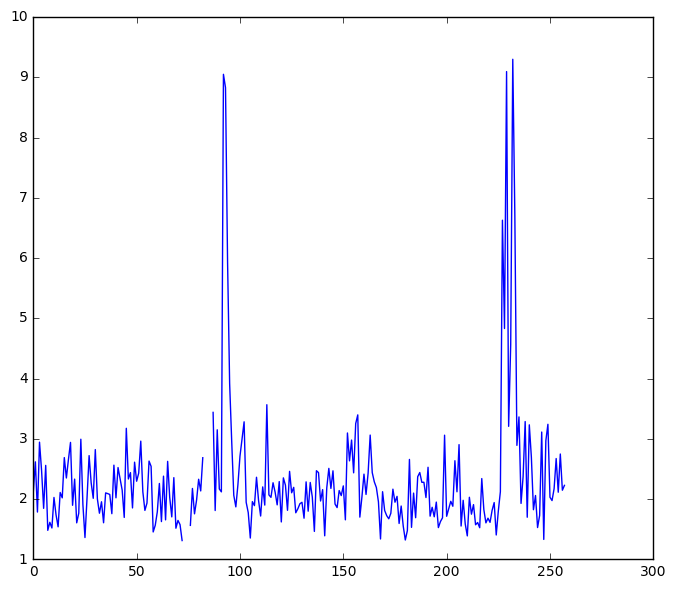

In [7]:
### calculating daily_mean_speed of one bird and plotting it.
data = birddata[birddata.bird_name == "Eric"]
times = data.timestemp
elasped_time = [time - times[0] for time in times]
elasped_day = np.array(elasped_time) / datetime.timedelta(days = 1) 

next_day = 1
ind = []
daily_mean_speed = []
for i, t in enumerate(elasped_day):
    if t < next_day:
        ind.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[ind]))
        next_day += 1
        ind = []

plt.figure(figsize=(8,7))
plt.plot(daily_mean_speed)
plt.xlabel('Days')
plt.ylabel('Daily_mean_(m/s)')
plt.show()


Here i have tried to explain bird moving pattern in kind of 3D manner for all three birds.

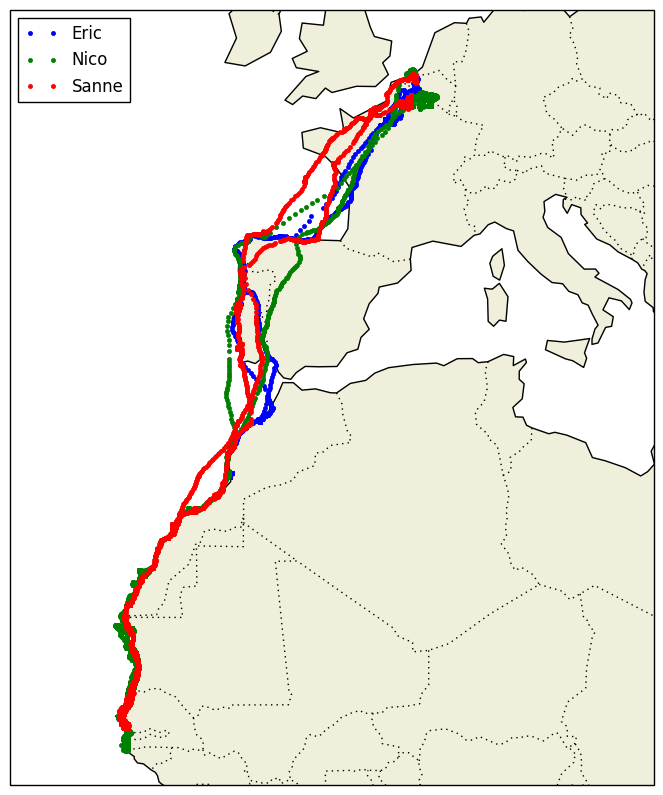

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    y, x = birddata.latitude[ix], birddata.longitude[ix]
    ax.plot(x, y,".", transform=ccrs.Geodetic(), label=bird_name)
plt.legend(loc="upper left")
plt.show()
